# Japan I/O Data Analysis Log

In [ ]:
exec(open('../config_dev.py').read())

In [46]:
import pandas as pd

df = datasets_df.loc[(datasets_df['Type'] == 'D matrix') & (datasets_df['Dataset Name'].str.contains('Japan'))]
df.set_index('Dataset ID',inplace=True)
df

,Dataset Name,Description,Type,Data provenance,Download links
Dataset ID,,,,,
15,Japan 1995 with trimming,Japan 1995 with trimming,D matrix,https://github.com/IGARDS/RPLib/blob/main/pipe...,https://raw.githubusercontent.com/IGARDS/japan...
16,Japan 2005 with trimming,Japan 2005 with trimming,D matrix,https://github.com/IGARDS/RPLib/blob/main/pipe...,https://raw.githubusercontent.com/IGARDS/japan...
17,Japan 2005 without trimming,Japan 2005 without trimming,D matrix,https://github.com/IGARDS/RPLib/blob/main/pipe...,https://raw.githubusercontent.com/IGARDS/japan...
18,Japan 1995 without trimming,Japan 1995 without trimming,D matrix,https://github.com/IGARDS/RPLib/blob/main/pipe...,https://raw.githubusercontent.com/IGARDS/japan...


## D Matrix Creation

In [47]:
for ix in df.index:
    !python ../../pipelines/create_D_from_D.py {ix} {ix}

load_D_from_D
https://raw.githubusercontent.com/IGARDS/japan_io_analysis/master/jpn2005_liot_w_trim/jpn1995_liot.csv
Removing any rows + columns without information
Shape before (102, 102)
Shape after (102, 102)
          0         1         2         3    ...       98   99   100  101
0    0.023481  0.104087  0.000000  0.000000  ...  0.000000  0.0  0.0  0.0
1    0.012583  0.107123  0.000000  0.000000  ...  0.000000  0.0  0.0  0.0
2    0.069588  0.046472  0.000000  0.000000  ...  0.000000  0.0  0.0  0.0
3    0.000000  0.000000  0.000000  0.234211  ...  0.000000  0.0  0.0  0.0
4    0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.0  0.0  0.0
..        ...       ...       ...       ...  ...       ...  ...  ...  ...
97   0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.0  0.0  0.0
98   0.000000  0.000000  0.000000  0.000000  ...  0.028682  0.0  0.0  0.0
99   0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.0  0.0  0.0
100  0.000000  0.000000  0.000000  0.000000  ...

## Manual Update to dataset_tool_Ds.tsv

Now you must manually make changes to dataset_tool_Ds.tsv and push.

## LOP Card Creation

### Dataset IDs

In [ ]:
for ix in df.index:
    print(ix)
    !python ../../pipelines/create_lop_card.py {ix} {ix}

15
Link    ./15_D.json
Name: 15, dtype: object
(102, 102)
Academic license - for non-commercial use only - expires 2022-09-05
Using license file /home/jupyter-pander14/gurobi.lic


## Show how you can import a LOP Card

In [20]:
import sys
from pathlib import Path
home = str(Path.home()) # all other paths are relative to this path. 
sys.path.insert(0,home)

In [21]:
%load_ext autoreload
%autoreload 2

In [22]:
import RPLib.pyrplib as pyrplib

In [28]:
lop_card = pyrplib.base.LOPCard.from_json("./15_lop_card.json")

In [29]:
lop_card._instance

D                    {'0': {'0': 0.0234806, '1': 0.10408654, '2': 0...
obj                                                          39.441173
solutions            [[100, 99, 97, 89, 98, 96, 69, 90, 87, 86, 79,...
max_tau_solutions                                                 None
centroid_x           [[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0,...
outlier_solution     [94, 72, 73, 71, 93, 88, 92, 7, 27, 67, 81, 76...
dataset_id                                                          15
source_dataset_id                                                   15
centroid_solution    [94, 72, 73, 71, 93, 92, 88, 7, 27, 67, 5, 81,...
dtype: object

In [30]:
pd.DataFrame(lop_card.solutions)

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,100,99,97,89,98,96,69,90,87,86,...,67,27,7,92,88,93,71,73,72,94
1,100,99,97,96,89,98,87,86,79,78,...,67,27,7,92,88,93,71,73,72,94
2,94,72,73,71,93,88,92,7,27,67,...,69,31,70,78,86,98,96,89,97,100
3,94,72,73,71,93,92,88,7,27,67,...,51,49,47,100,45,79,74,66,65,63


## Plotting examples

In [31]:
import ranking_toolbox.pyrankability as pyrankability

In [32]:
D = pd.DataFrame(lop_card.D)

In [33]:
x=pd.DataFrame(lop_card.centroid_x,index=D.index,columns=D.columns)
g,scores,ordered_xstar=pyrankability.plot.show_single_xstar(x)

In [34]:
g

alt.Chart(...)

In [35]:
lop_card._instance

D                    {'0': {'0': 0.0234806, '1': 0.10408654, '2': 0...
obj                                                          39.441173
solutions            [[100, 99, 97, 89, 98, 96, 69, 90, 87, 86, 79,...
max_tau_solutions                                                 None
centroid_x           [[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0,...
outlier_solution     [94, 72, 73, 71, 93, 88, 92, 7, 27, 67, 81, 76...
dataset_id                                                          15
source_dataset_id                                                   15
centroid_solution    [94, 72, 73, 71, 93, 92, 88, 7, 27, 67, 5, 81,...
dtype: object

In [36]:
D.index[lop_card.outlier_solution]

Index(['94', '72', '73', '71', '93', '88', '92', '7', '27', '67',
       ...
       '69', '31', '70', '78', '86', '98', '96', '89', '97', '100'],
      dtype='object', length=102)

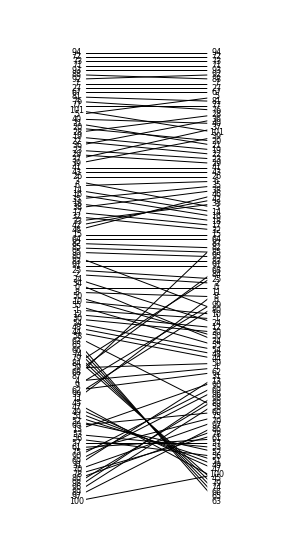

In [44]:
outlier_solution = pd.Series(lop_card.outlier_solution,index=D.index[lop_card.outlier_solution],name="Farthest from Centroid")
centroid_solution = pd.Series(lop_card.centroid_solution,index=D.index[lop_card.centroid_solution],name="Closest to Centroid")
pyrankability.plot.spider3(outlier_solution,centroid_solution)
print()